In [1]:
%matplotlib inline

from simulation.community import Community, VoteConstraints
from simulation.student import Student
from simulation.artifact import Quality
from reputation.algorithm import allAlgorithms
from output.chart import chart
from output.metrics import printMetrics, printStdDevMetrics

# Competence Test


This test examines whether students that are more likely to produce quality
artifacts as well as vote more correctly receive a higher reputation score, which is
common sense.

In [2]:
testName = "Competence"
community = Community()

### Actions

Action Prototypes


In [3]:
postGoodArtefact = community.createPostAction(Quality.GOOD)
postBadArtefact = community.createPostAction(Quality.BAD)
voteBadNegative = community.createVoteAction(Quality.BAD, VoteConstraints.BADART)
voteAnyNegative = community.createVoteAction(Quality.BAD, VoteConstraints.NONE)
voteGoodPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.GOODART)
voteAnyPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.NONE)
idle = community.createIdleAction()

### Student Archetypes

The first group of archetypes are students with low competence

In [4]:
lowStudent = Student("low",
        [
            (0.1, postGoodArtefact),
            (0.1, postBadArtefact),
            (0.2, voteBadNegative),
            (0.2, voteAnyNegative),
            (0.2, voteGoodPositive),
            (0.2, voteAnyPositive),
        ])
community.addStudents(lowStudent, 10)

Students of medium competence ...

In [5]:
avgStudent = Student("avg",
        [
            (0.14, postGoodArtefact),
            (0.06, postBadArtefact),
            (0.28, voteBadNegative),
            (0.12, voteAnyNegative),
            (0.28, voteGoodPositive),
            (0.12, voteAnyPositive),
        ])
community.addStudents(avgStudent, 10)

Students with high competence

In [6]:
highStudent = Student("high",
        [
            (0.18, postGoodArtefact),
            (0.02, postBadArtefact),
            (0.36, voteBadNegative),
            (0.04, voteAnyNegative),
            (0.36, voteGoodPositive),
            (0.04, voteAnyPositive),
        ])

community.addStudents(highStudent, 10)

## Synthesis

Reputation scores are based on 100 actions by the 30 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Mean & Std. Dev.: InDegree ########
Distinction: 0.785437582749 ± 0.704748999016
Correctness: 0.667333333333 ± 0.0912846585626
Inversion Quality: 0.870566666667 ± 0.0442619851942

######## Mean & Std. Dev.: InDegreePositive ########
Distinction: 0.691494653052 ± 0.536669573541
Correctness: 0.486666666667 ± 0.0918936583473
Inversion Quality: 0.6993 ± 0.074913720743

######## Mean & Std. Dev.: EigenTrust ########
Distinction: 0.782058218601 ± 0.498898779157
Correctness: 0.623 ± 0.0913716464653
Inversion Quality: 0.842733333333 ± 0.047025714006

######## Mean & Std. Dev.: PageRank ########
Distinction: 0.665424065777 ± 0.473054211991
Correctness: 0.489666666667 ± 0.093297016744
Inversion Quality: 0.7023 ± 0.0761777089005


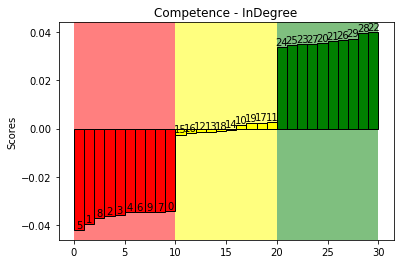

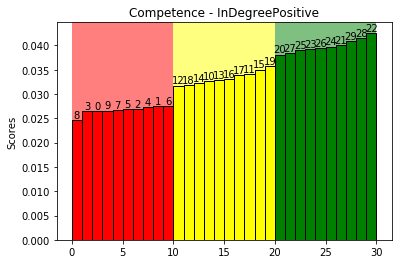

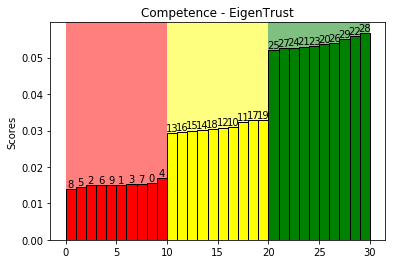

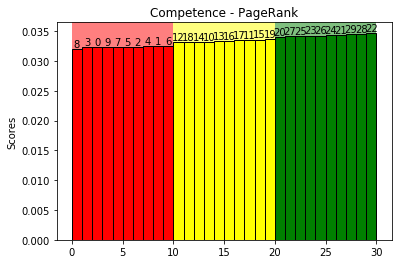

In [7]:
groups = ('low', 'avg', 'high')
colors = {'low': 'r', 'avg': 'yellow', 'high': 'g'}
results = community.run([InDegree(), InDegreePositive(), EigenTrust(), PageRank()], 100, 100)
for (name, result, intermediateResults) in results:
    c = chart(result, groups, colors, testName + " - " + name)
    # printMetrics(name, result, groups)
    printStdDevMetrics(name, intermediateResults, groups)